In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

In [183]:
df = pd.read_csv("data/df_progress.csv")
df.head()

,men,seed_home,aces_home,breakpoints_won_home,first_serve_points_won_home,first_serve_successful_home,games_won_home,max_games_in_a_row_home,max_points_in_a_row_home,points_won_home,...,avg_set_diff,avg_set_games,sets,errors_home,unforced_errors_home,winners_home,errors_away,unforced_errors_away,winners_away,avg_set_diff_abs
0,False,0,7.0,0.500000,20.5,25.500000,6.500000,3.0,5,42.5,...,1.500000,11.500000,2,31.500000,24.000000,29.000000,27.500000,13.000000,16.000000,1.500000
1,False,1,3.0,1.500000,18.0,33.000000,7.000000,2.0,6,45.5,...,1.000000,13.000000,2,31.000000,17.500000,13.000000,27.000000,41.000000,27.000000,1.000000
2,False,1,2.5,2.000000,10.5,15.000000,6.000000,3.0,7,38.5,...,2.500000,9.500000,2,16.500000,27.000000,20.000000,22.500000,26.000000,12.000000,2.500000
3,False,1,2.0,2.000000,16.0,25.333333,5.666667,3.0,9,39.0,...,0.666667,10.666667,3,34.666667,22.000000,23.666667,30.333333,16.666667,14.000000,0.666667
4,False,0,1.0,1.666667,14.0,19.666667,6.000000,4.0,6,36.0,...,2.000000,10.000000,3,24.666667,18.666667,12.000000,31.333333,23.333333,12.333333,2.000000


In [184]:
overall_stats = []
specific_stats = set()
for col in df.columns:
    if "home" not in col and "away" not in col:
        overall_stats.append(col)
    elif "home" in col:
        specific_stats.add(re.match(r"^(.*?)\_home",col).group(1))
    elif "away" in col:
        specific_stats.add(re.match(r"^(.*?)\_away",col).group(1))



In [185]:
overall_stats

['men',
 'avg_set_length',
 'avg_game_length',
 'avg_points_per_game',
 'match_length',
 'avg_set_diff',
 'avg_set_games',
 'sets',
 'avg_set_diff_abs']

Looking @ distributions, checking for outliers

In [186]:
def plt_dist(var, xlabel):
    m_dist = df[df['men']][var]
    w_dist = df[~df['men']][var]
    m_mean = np.mean(m_dist)
    w_mean = np.mean(w_dist)

    plt.hist(m_dist, alpha=0.4, label='Mens', color = 'blue') #0d98ba
    plt.hist(w_dist, alpha=0.4, label='Womens', color = 'orange') #7804b3
    plt.axvline(m_mean, color = 'blue', linestyle='dashed', linewidth=2)
    plt.axvline(w_mean, color='orange', linestyle='dashed', linewidth=2)
    plt.title(var.replace("_"," ").title())
    plt.xlabel(xlabel)
    plt.ylabel("Matches")
    plt.legend(loc='upper right')
    plt.show()

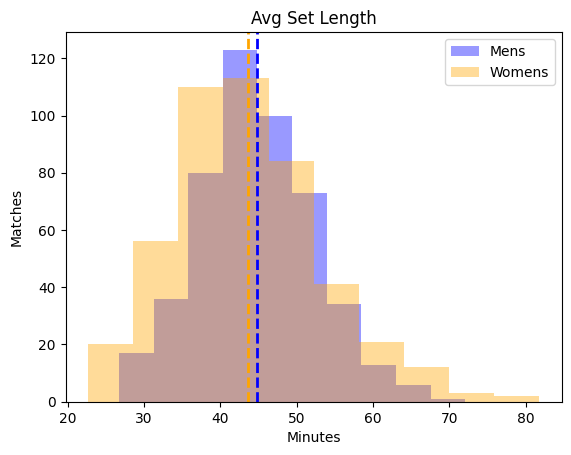

In [187]:
plt_dist('avg_set_length',"Minutes")

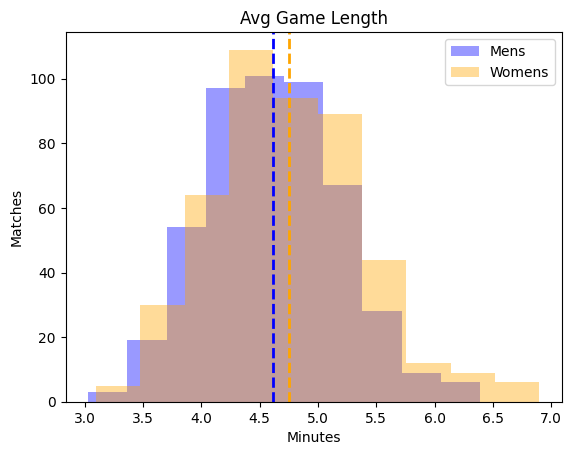

In [188]:
plt_dist('avg_game_length',"Minutes")

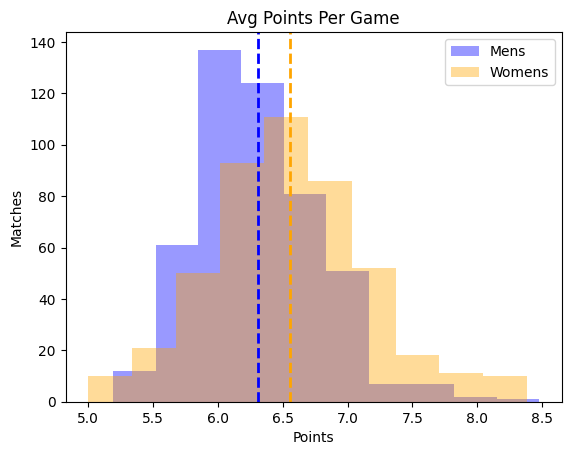

In [189]:
plt_dist('avg_points_per_game',"Points")

In [190]:
# plt_dist('match_length',"Minutes") # this is not a good point of comparison because mens matches in grand slams are best of five and womens are best of three

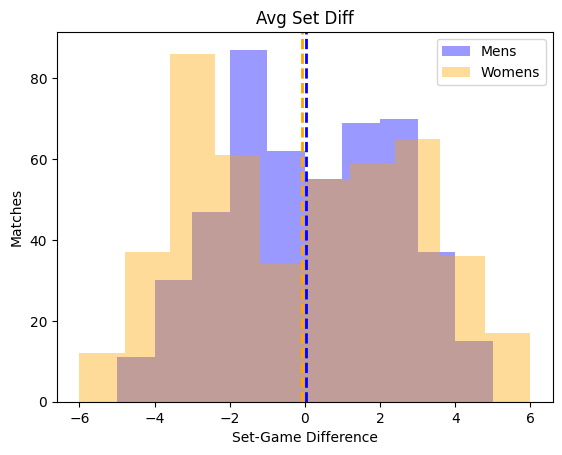

In [191]:
plt_dist('avg_set_diff',"Set-Game Difference") # I think this is an interesting variable to look into (not sure if the name describes it right) because it represents how much one player beat another in a given set averaged across all the sets. I actually think this would be more interesting to look at the absolute value because we don't care if it was home or away that won by a lot.

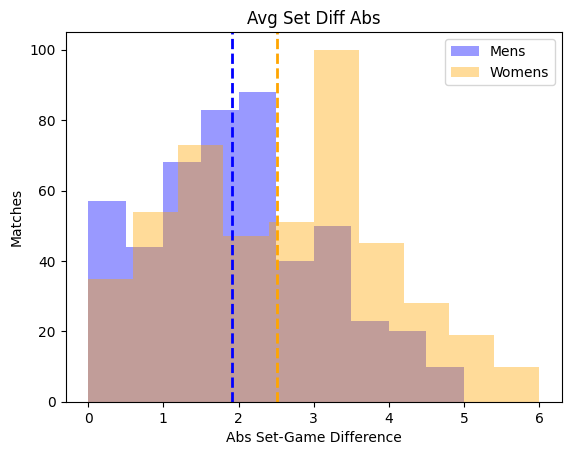

In [192]:
plt_dist('avg_set_diff_abs',"Abs Set-Game Difference")

Conclusions about overall stats:

- Match length remove ?? Apples to oranges
- Use abs set difference instead of set difference --> definitely worth looking into here
- The other variables have similar distributions but worth keeping for now

Looking at specific stats --> places to combine?

In [193]:
h="_home"
a="_away"

def drop_both(var):
    return df.drop(columns=[var+h, var+a])

def drop(var):
    return df.drop(columns=[var])

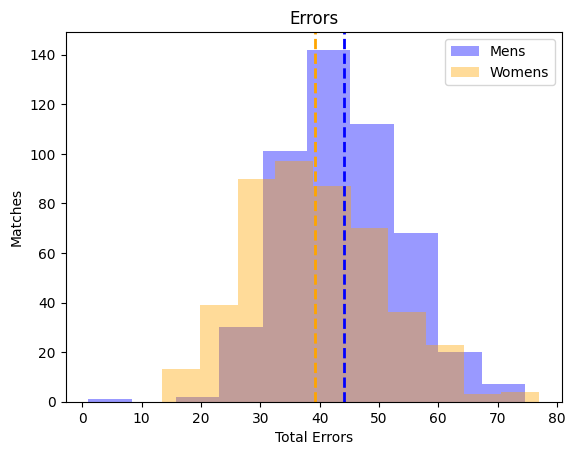

In [194]:
curr = 'errors'
df[curr] = df[curr+h]+df[curr+a]
df = drop_both(curr)
plt_dist(curr, "Total Errors")

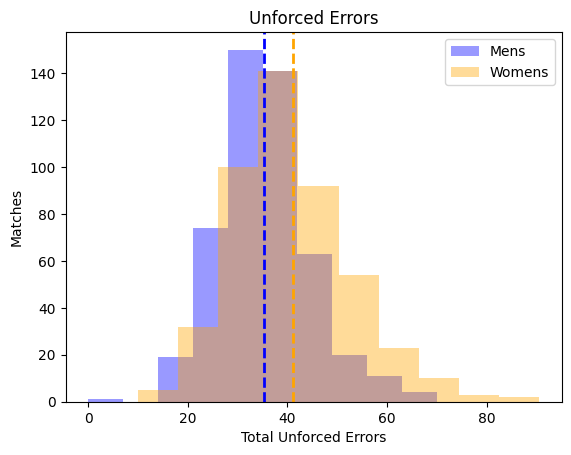

In [195]:
curr = 'unforced_errors'
df[curr] = df[curr+h]+df[curr+a]
df = drop_both(curr)
plt_dist(curr, "Total Unforced Errors")

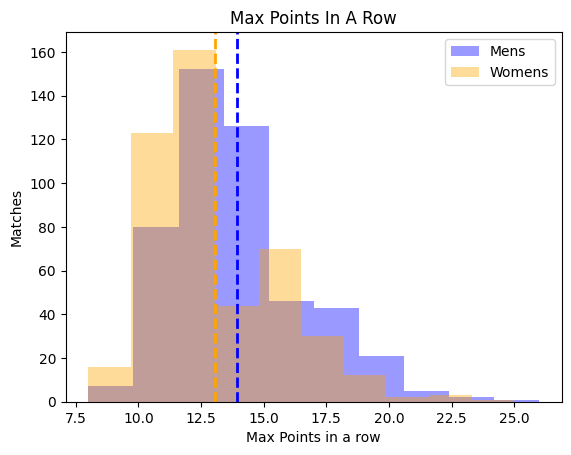

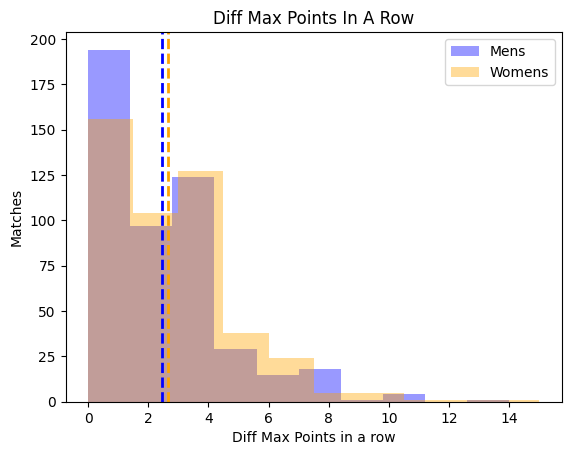

In [196]:
curr = 'max_points_in_a_row'
df[curr] = df[curr+h]+df[curr+a]
df['diff_'+curr] = abs(df[curr+h]-df[curr+a])
df = drop_both(curr)
plt_dist(curr, "Max Points in a row")
plt_dist('diff_'+curr, "Diff Max Points in a row")


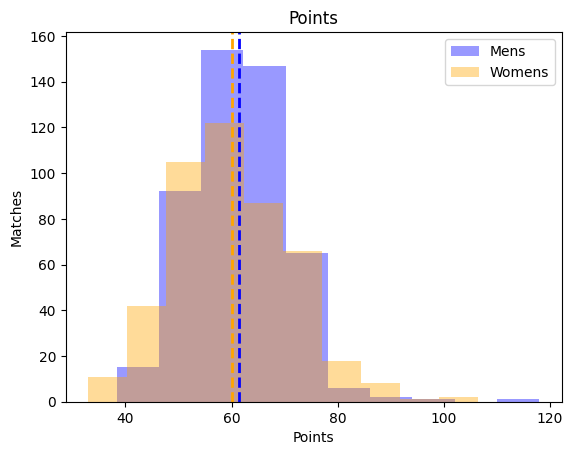

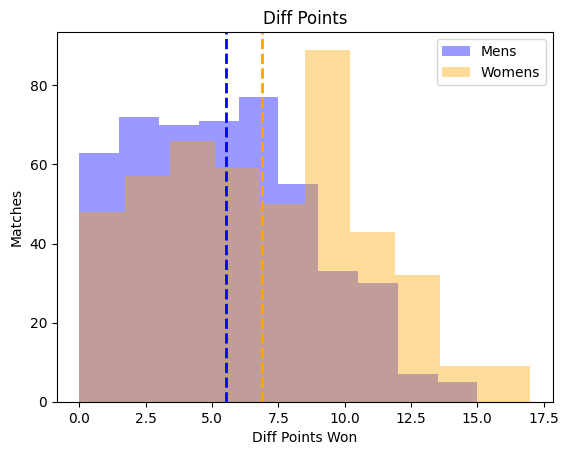

In [199]:
curr = 'points_won'
df['points']=df[curr+h]+df[curr+a]
df['diff_points']=abs(df[curr+h]-df[curr+a])
plt_dist('points', "Points")
plt_dist('diff_points', "Diff Points Won")
# df = drop_both(curr)

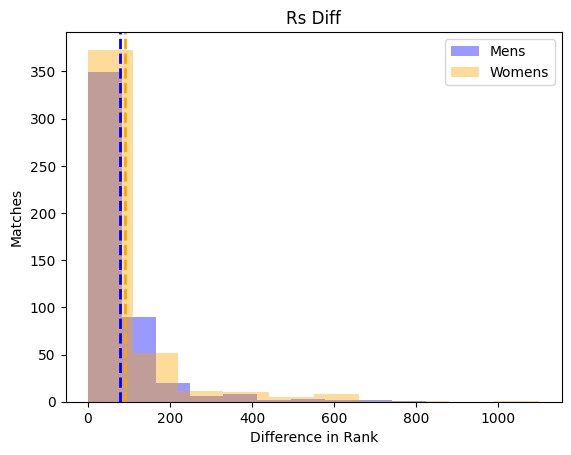

In [162]:
df['rs_diff'] = df['rs'+h]-df['rs'+a]
df['expected_win'] = (df['win'+h] & df['rs_diff']>0) | (~df['win'+h] & df['rs_diff']<0)
df['rs_diff'] = abs(df['rs_diff'])

# not super surprising - distribution is not going to say anything men versus women
plt_dist('rs_diff', "Difference in Rank")

df[['men','expected_win']].value_counts() # looks like an even distribution
df = drop_both('rs')

In [163]:
curr = 'seed'
df['seed_sum'] = df[curr+h]+df[curr+a]
df = drop_both('seed')
df[['men','seed_sum']].value_counts()

men    seed_sum
True   1           272
False  1           251
       2           173
True   2           153
       0            58
False  0            38
Name: count, dtype: int64

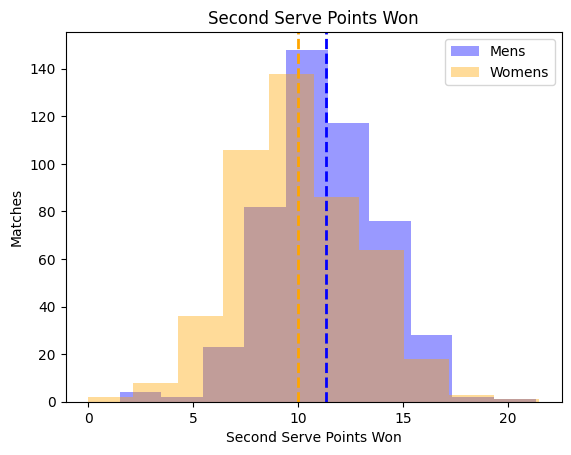

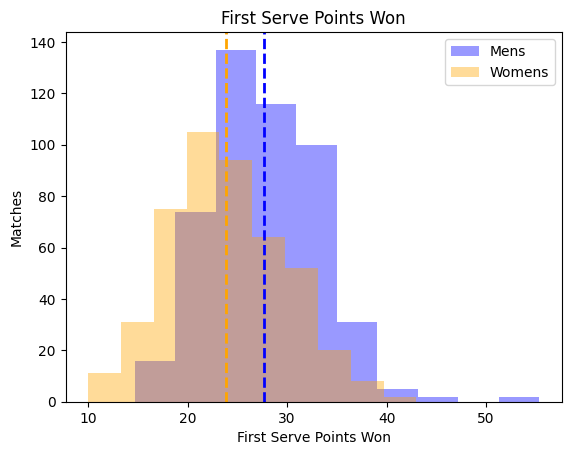

In [164]:
curr = 'second_serve_points_won'
df[curr] = df[curr+h]+df[curr+a]
df = drop_both(curr)
plt_dist(curr, "Second Serve Points Won")

curr = 'first_serve_points_won'
df[curr] = df[curr+h]+df[curr+a]
df = drop_both(curr)
plt_dist(curr, "First Serve Points Won")

In [145]:
list(specific_stats)

['first_serve_points_won',
 'breakpoints_won',
 'total_breakpoints',
 'rs',
 'service_points_lost',
 'errors',
 'unforced_errors',
 'winners',
 'seed',
 'second_serve_successful',
 'win',
 'aces',
 'points_won_from_last_10',
 'points_won',
 'first_serve_successful',
 'max_points_in_a_row',
 'tiebreaks_won',
 'games_won',
 'second_serve_points_won',
 'service_points_won',
 'service_games_won',
 'max_games_in_a_row']

In [ ]:
to_remove = ['tiebreaks_won','match_length','points']
to_remove_all = []
for col in to_remove:
    to_remove_all.append(to_remove+h)
    to_remove_all.append(to_remove+a)
df = df.drop(columns= to_remove_all)